In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Audio
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt

(2001,)
(1220,)


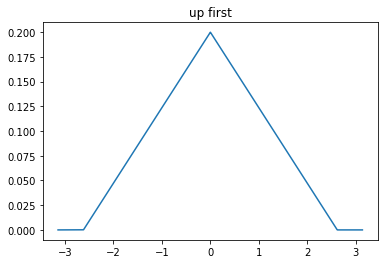

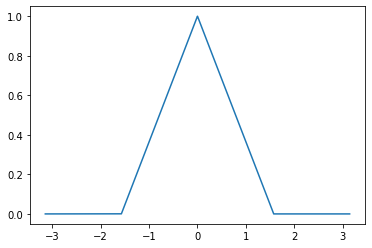

In [20]:
'''
experiment of the resampling, pay no attention
'''
#Provided function with triangle magnitude spectrum
def toy_signal(w_c):
    N = 1000
    gain = 2*np.pi/w_c
    return gain * np.array([(np.sin(w_c/2*(n+1))/(np.pi*(n+1)))**2 if n+1 != 0 else (w_c/(2*np.pi))**2 for n in range(-N,N+1)])

%matplotlib inline


#Fill in this function for part 1.a:
def upsample(U,x):
    
    #create a length len(x)*[1+(U+1)]-1
    upsampled = np.zeros(len(x)*(1+(U-1))-1)
        
    #interpolate U-1 zeros between every two entries
    for n in range(0,len(upsampled)):
        if (n/U)%1==0: 
            upsampled[n] = x[int(n/U)]
            
        else:
            upsampled[n] = 0

    return upsampled



#Fill in this function for part 1.c:
def lowpass(C):
    wc = np.pi/C/np.pi
    
    #PM filter
    N = 100
    a = [1,0]
    #lpf
    lpf_bands = [0,wc,wc+0.1,1]
    lpf_desired = [1,0] #gain of one for passband, gain of zero for stopband
    lpf = signal.remez(N,lpf_bands,lpf_desired,fs=2)

    w,H_lpf = signal.freqz(lpf,a)

    return lpf


#Fill in this function for part 2.a:
def downsample(D,x):
    
    downsampled = np.zeros(int(len(x)/D))
    
    for n in range(int(len(x)/D)):
        downsampled[n] = x[n*D]
    
    return downsampled



#Code for part 2.d:
x = toy_signal(np.pi/2)
X = np.fft.fft(x)
X = np.fft.fftshift(X)  #fft.fft gives a dtft 0-2pi,zero-center it

#upsampling 1st
#upsample by 3
y = upsample(3,x)
Y = np.fft.fft(y)
Y = np.fft.fftshift(Y)


#post-interpolation filtering
#create filter
lpf = lowpass(3)
LPF = np.fft.fft(lpf,1000)
LPF = np.fft.fftshift(LPF)

#convolution
y = np.convolve(lpf,y)
Y = np.fft.fft(y)
Y = np.fft.fftshift(Y)


#downsample by 5
y = downsample(5,y)
Y = np.fft.fft(y)
Y = np.fft.fftshift(Y)


w1 = np.linspace(-np.pi,np.pi,len(Y))
plt.figure()
plt.title('up first')
plt.plot(w1,abs(Y))
w2 = np.linspace(-np.pi,np.pi,len(X))
plt.figure()
plt.plot(w2,abs(X))

print(x.shape)
print(y.shape)

In [ ]:
'''
Functions: lpf, upsample, downsample
'''

def upsample(U,x):
    
    #create a length len(x)*[1+(U+1)]-1
    upsampled = np.zeros(len(x)*(1+(U-1))-1)
        
    #interpolate U-1 zeros between every two entries
    for n in range(0,len(upsampled)):
        if (n/U)%1==0: 
            upsampled[n] = x[int(n/U)]
            
        else:
            upsampled[n] = 0

    return upsampled


def lowpass(C):
    wc = np.pi/C/np.pi
    
    #PM filter
    N = 100
    a = [1,0]
    #lpf
    lpf_bands = [0,wc,wc+0.1,1]
    lpf_desired = [1,0] #gain of one for passband, gain of zero for stopband
    lpf = signal.remez(N,lpf_bands,lpf_desired,fs=2)

    w,H_lpf = signal.freqz(lpf,a)

    return lpf


def downsample(D,x):
    
    downsampled = np.zeros(int(len(x)/D))
    
    for n in range(int(len(x)/D)):
        downsampled[n] = x[n*D]
    
    return downsampled



'''
Function: resample
This function will resample any input signal to the input fraction
@param signal: the signal to be resampled
@param numerator: numerator of the fraction
@param denominator: denominator of the fraction
@return signal: resampled signal
'''
def resample(signal, numer, denom):        
    X = np.fft.fft(signal)
    X = np.fft.fftshift(X)  #fft.fft gives a dtft 0-2pi,zero-center it

    #upsampling first
    #upsample by 
    y = upsample(numer,x)
    Y = np.fft.fft(y)
    Y = np.fft.fftshift(Y)

    #post-interpolation filtering
    #create filter
    lpf = lowpass(numer)
    LPF = np.fft.fft(lpf,100000)
    LPF = np.fft.fftshift(LPF)

    #convolution
    y = np.convolve(lpf,y)
    Y = np.fft.fft(y)
    Y = np.fft.fftshift(Y)

    #downsample by 5
    y = downsample(denom,y)
    Y = np.fft.fft(y)
    Y = np.fft.fftshift(Y)

    w1 = np.linspace(-np.pi,np.pi,len(Y))
    plt.figure()
    plt.title('up first')
    plt.plot(w1,abs(Y))
    
    return y

    
'''
Function: resample2Standard
This function will resample any input signal to 44100Hz
@param signal: the signal to be resampled
@param fs: the input signal's sampling rate
@return signal: the resampled signal
'''
def resample2Standard(signal, fs):
    #first determine if the signal is 22100Hz
    if fs == 22100:
        signal = resample(signal, 2, 1)
    else:
        signal = resample(signal, 44100, fs)
    return signal


'''
exp main
'''
exp_sig = np.array([np.sin(np.pi*i) for i in range(0,22500)])
res_sig = resample2Standard(exp_sig, 22500)
plt.figure()
plt.title("exp")
plt.plot(exp_sig)
plt.figure()
plt.title("res")
plt.plot(res_sig)

In [19]:
'''
Function: get steady state a time-domain signal
@param sig: input time-domain signal
@return sts_sig: the stead-state part of the input
'''
def getSteadyState(sig):
    #first get the amplitude of the signal
    all_sig = sig * sig
    #first get the average amplitude
    avg = sum(all_sig)/len(all_sig)
    #find the part below avgerage from the back
    rev_sig = all_sig[::-1]
    for i in range(0,len(rev_sig)):
        if rev_sig[i] > avg:
            back_idx = i
            break
    back_idx = len(rev_sig) - back_idx
    #find the part below avgerage from the front
    for i in range(0,len(all_sig)):
        if all_sig[i] > avg:
            front_idx = i
            break
   
    #get the steady-state signal
    sts_sig = sig[front_idx : back_idx]
#     print("sts's length: ", sts_sig.shape, "original's length ",sig.shape)
    
    return sts_sig

workspace: /mnt/c/Users/24488/Desktop/Study/ECE397Project/ece397_project
loading in: clarinet01.wav
loading in: flute01.wav
loading in: flute02.wav
loading in: piano01.wav
loading completed
start FFT
FFT completed
loading in: instru_types.txt
['flute', 'clarinet', 'piano']
loading completed


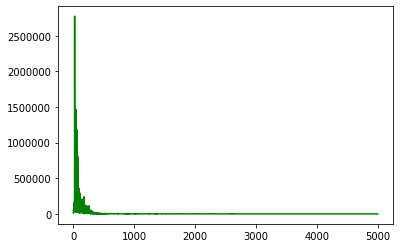

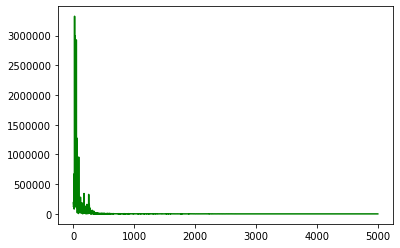

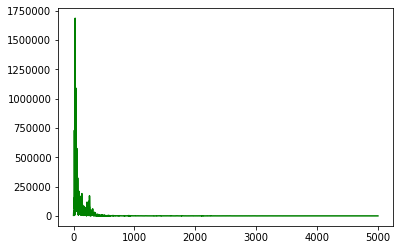

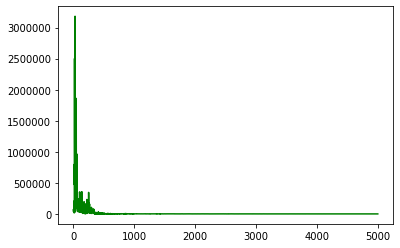

In [33]:
#get the current workspace's abs path
path = os.getcwd()
print("workspace: " + path)
#get the file names of instrument sounds
snds_path = os.listdir(path + '/instru_snds')

#get all time-domain signals
snds = []
all_fs = []
for file in snds_path:
    if file.endswith(".wav"):
        print("loading in: " + file)
        audio = np.array([])
        fs,audio = wavfile.read('instru_snds/' + file) #load the data
        snds.append(audio)
        all_fs.append(fs)

print("loading completed")

for i in range(0,len(snds)):
    snds[i] = getSteadyState(snds[i])
snds = np.asarray(snds)
all_fs = np.asarray(all_fs)


#FFT
print("start FFT")
FFTs = []

for audio in snds:
    AUD = np.fft.rfft(audio, 10000)
    AUD = np.absolute(AUD)
    FFTs.append(AUD)

for AUD in FFTs:
    plt.figure()
    plt.plot(AUD,"g")
    
print("FFT completed")
FFTs = np.asarray(FFTs)


#classify and encapsulate into dictionary
for file in snds_path:
    if file.endswith(".txt"):
        print("loading in: " + file)
        types = []
        f = open('instru_snds/' + file, "r")
        for x in f:
            if x.endswith('\n'):
                types.append(x.rstrip('\n'))
            else:
                types.append(x)
f.close()
print(types)
print("loading completed")


#initialize the training set
#first classify the FFTs
for file in snds_path:
    for 